In [0]:
import numpy as np
import matplotlib.pyplot as plt

First, define a function that takes two inputs (a mean and a standard deviation) and spits out a random number.
The number should be generated randomly from a normal distribution with that mean and that standard deviation. See [numpy.random.normal](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html), though, implementing the PDF for a normal distribution is a good exercise if you finish early.

In [0]:
def rand_val(mean, stdev):
    ##################
    # Your Code Here #
    ##################
    return np.random.normal(mean, stdev)

Now define a function that takes in a mean, a standard deviation, and a number n, and returns a numpy vector with n components.
The components should be randomly generated from a normal distribution with that mean and standard deviation

In [0]:
def rand_vec(mean, stdev, n):
    ##################
    # Your Code Here #
    ##################
    return np.random.normal(mean, stdev, n)

Recall that there are many ways to compute the distance between two vectors. However you wish to do so, write a function that takes in
two vectors and returns the distance between them. Since this function only makes sense if the two vectors have the same number of
components, this function should return -1 if the two vectors live in different numbers of dimensions

In [0]:
def vec_dist(vecA, vecB):
    ##################
    # Your Code Here #
    ##################
    if vecA.shape != vecB.shape:
        return -1
    
    return np.linalg.norm(vecA - vecB)

From here on out, every component you randomly generate should come from a normal distribution centered at 0 with standard
deviation 1. With that in mind, write a function that takes in a number n (the number of dimensions), creates two random
vectors in n-dimensional space, calculates the distance between them, and returns that distance.

In [0]:
def rand_vec_dist(n):
    ##################
    # Your Code Here #
    ##################
    
    vecA, vecB = rand_vec(0, 1, n), rand_vec(0, 1, n)
    
    return vec_dist(vecA, vecB)

Using what you've made so far, what is the average distance between two points in 1-dimensional space? In other words, between
two regular old floating point numbers with mean 0 and standard deviation 1. After you calculate this, store it as the first
component in a Pythin list named average_dist_list.

In [6]:
def average_dist_calculator(n, trials):
    ##################
    # Your Code Here #
    ##################
    return np.mean([rand_vec_dist(n) for _ in range(trials)])
    
average_dist_list = [average_dist_calculator(1, 50)]
print(average_dist_list)

[1.1609500509528816]


What's the average distance between two points in 2-dimensional space? What about 3? Keep calculating these average distances and
appending them to average_dist_list up through 200-dimensional space.

In [7]:
##################
# Your Code Here #
##################

average_dist_list = [average_dist_calculator(n, 50) for n in range(0, 201)]

print(average_dist_list)

[0.0, 1.1566795042941553, 1.5761209937045653, 2.1826477639320316, 2.56234280331327, 2.7993350267369363, 3.4228667324217614, 4.157183382140875, 4.077731173365632, 4.1534261588224295, 4.342094025886554, 4.7447768574698275, 4.840238909081934, 5.137108089464906, 5.109047433883457, 5.3731359068555715, 5.600853293183041, 5.698770228141406, 5.825943210673992, 6.0533951342254895, 6.536780569139492, 6.462439076611486, 6.508277127589784, 6.6341076218317445, 7.0195553174854695, 7.3143425831399655, 7.332271683066519, 7.203124229138296, 7.295350995470309, 7.522084186738388, 7.706856485835931, 7.618135463629137, 7.9799365519702095, 7.937832040632814, 8.199273212932889, 8.105827776203649, 8.47134288666958, 8.502928660961027, 8.518577108019652, 8.818712485275997, 8.817532673471064, 8.955198709480932, 9.219279250116859, 9.361615210944255, 9.522404707262961, 9.67566937810008, 9.365647666726243, 9.534705636608841, 9.648182284756215, 9.721545422564951, 10.234472295822888, 9.90023553366127, 10.146857545492

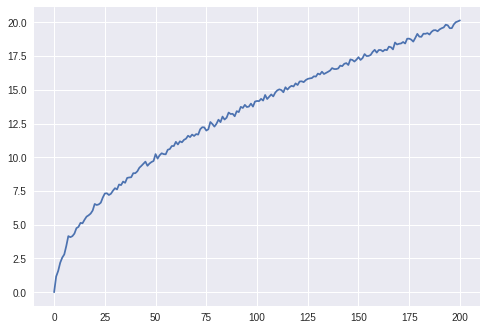

In [8]:
n = np.arange(0, 201)
plt.plot(n,average_dist_list);

As the number of dimensions n grows larger and larger, approximately how does the average distance grow?

It should be well-approximated by the function f(n) = c*n^p for some numbers c and p. However you choose to do so, find the values of c and p.

Using my reasoning from the [Vector Magnitude Coding Challenge](https://github.com/rayheberer/LambdaSchoolDataScience/blob/master/Week%201%20Mathematical%20Foundations/Code%20Challenges/Day%204%20Vector%20Magnitude.ipynb), I expect that the average distance between points will be proportional to the square root of the dimension of the space.

I will first create square-root features, and then fit a linear estimator to them.

In [0]:
from sklearn.linear_model import LinearRegression

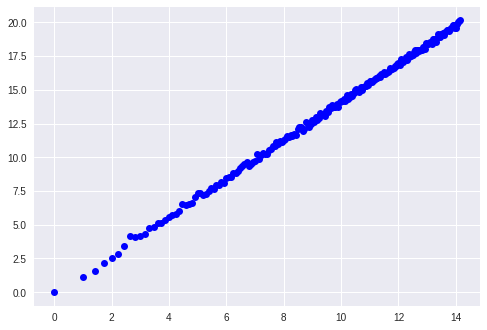

In [10]:
root_n = np.sqrt(n)
plt.plot(root_n,average_dist_list, 'bo');

In [0]:
# the y-intercept should be zero, since it is not meaningful for the average distance between objects in the zero vector space to be nonzero
model = LinearRegression(fit_intercept=False)

root_n = root_n.reshape((-1, 1))
average_dist_list = np.array(average_dist_list).reshape((-1, 1))
model.fit(root_n, average_dist_list);

In [12]:
c = model.coef_
print(c)

[[1.41115361]]


So our function is about $f(n) = 1.41\sqrt{n}$

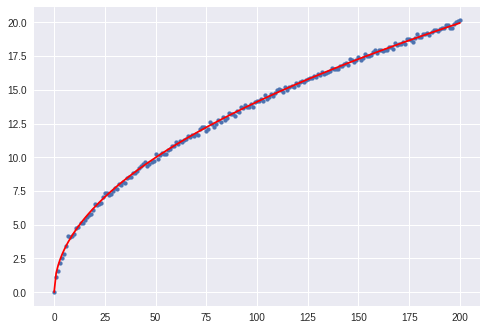

In [13]:
line = c*np.sqrt(n)
line = line.reshape(-1,)

plt.scatter(n,average_dist_list, s=15)
plt.plot(n, line, color='red');